# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_r = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_r["coord"]["lat"]
        city_lng = city_r["coord"]["lon"]
        city_max_temp = city_r["main"]["temp_max"]
        city_humidity = city_r["main"]["humidity"]
        city_clouds = city_r["clouds"]["all"]
        city_wind = city_r["wind"]["speed"]
        city_country = city_r["sys"]["country"]
        city_date = city_r["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tehri
Processing Record 2 of Set 1 | pierre
Processing Record 3 of Set 1 | teahupoo
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | jumla
Processing Record 6 of Set 1 | hami
Processing Record 7 of Set 1 | sokolo
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | purranque
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | marmora
Processing Record 14 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 1 | puerto escondido
Processing Record 16 of Set 1 | ulladulla
Processing Record 17 of Set 1 | turayf
Processing Record 18 of Set 1 | skjervoy
Processing Record 19 of Set 1 | saint-augustin
Processing Record 20 of Set 1 | oudtshoorn
Processing Record 21 of Set 1 | miraflores
Processing Record 22 of Set 1 | riyadh
Processing Re

In [59]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [60]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tehri,30.3833,78.4833,14.41,39,0,2.31,IN,1670597973
1,pierre,44.3683,-100.3510,-13.49,85,100,0.00,US,1670597882
2,teahupoo,-17.8333,-149.2667,20.98,77,62,3.51,PF,1670597974
3,mataura,-46.1927,168.8643,11.21,97,98,0.50,NZ,1670597974
4,jumla,29.2747,82.1838,4.90,46,0,2.39,NP,1670597975


In [61]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [81]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
#city_data_df.set_index("City ID").head()

#city_data_df.set_index("City_ID",)
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,tehri,30.3833,78.4833,14.41,39,0,2.31,IN,1670597973
1,1,pierre,44.3683,-100.3510,-13.49,85,100,0.00,US,1670597882
2,2,teahupoo,-17.8333,-149.2667,20.98,77,62,3.51,PF,1670597974
3,3,mataura,-46.1927,168.8643,11.21,97,98,0.50,NZ,1670597974
4,4,jumla,29.2747,82.1838,4.90,46,0,2.39,NP,1670597975


In [82]:
#city_data_df.to_html(columns=["City_ID"])
print(city_data_df.to_html(index=False, sparsify=False))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>City_ID</th>
      <th>City</th>
      <th>Lat</th>
      <th>Lng</th>
      <th>Max Temp</th>
      <th>Humidity</th>
      <th>Cloudiness</th>
      <th>Wind Speed</th>
      <th>Country</th>
      <th>Date</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>tehri</td>
      <td>30.3833</td>
      <td>78.4833</td>
      <td>14.41</td>
      <td>39</td>
      <td>0</td>
      <td>2.31</td>
      <td>IN</td>
      <td>1670597973</td>
    </tr>
    <tr>
      <td>1</td>
      <td>pierre</td>
      <td>44.3683</td>
      <td>-100.3510</td>
      <td>-13.49</td>
      <td>85</td>
      <td>100</td>
      <td>0.00</td>
      <td>US</td>
      <td>1670597882</td>
    </tr>
    <tr>
      <td>2</td>
      <td>teahupoo</td>
      <td>-17.8333</td>
      <td>-149.2667</td>
      <td>20.98</td>
      <td>77</td>
      <td>62</td>
      <td>3.51</td>
      <td>PF</td>
      <td>167059

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

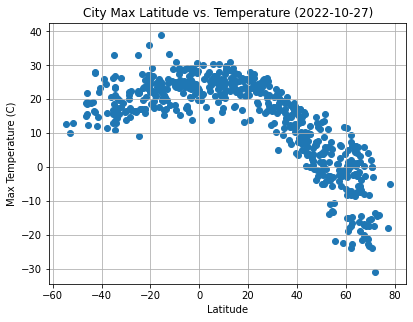

In [29]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Add Title, Labels, and Gridlines to plot
plt.title("City Max Latitude vs. Temperature (2022-10-27)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

plt.scatter(x_values, y_values)
plt.rcParams["figure.figsize"] = (6.4,4.8)

# Save the figure
plt.savefig("output_data/Fig11.jpg")

# Show plot
plt.show()

#### Latitude Vs. Humidity

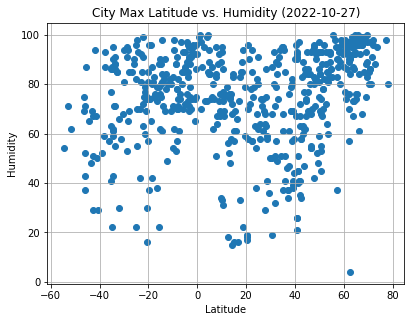

In [30]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Add Title, Labels, and Gridlines to plot
plt.title("City Max Latitude vs. Humidity (2022-10-27)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

plt.scatter(x_values, y_values)

# Save the figure
plt.savefig("output_data/Fig22.jpg")

# Show plot
plt.show()

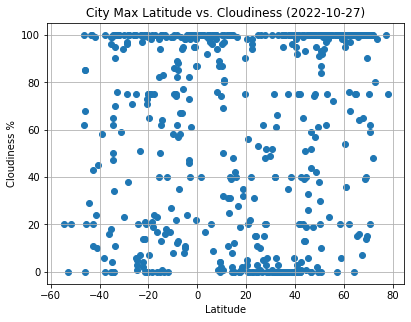

In [31]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Add Title, Labels, and Gridlines to plot
plt.title("City Max Latitude vs. Cloudiness (2022-10-27)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()

plt.scatter(x_values, y_values)

# Save the figure
plt.savefig("output_data/Fig3.jpg")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

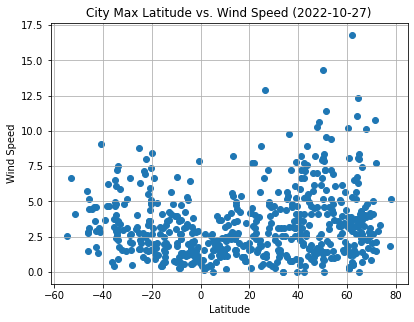

In [32]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Add Title, Labels, and Gridlines to plot
plt.title("City Max Latitude vs. Wind Speed (2022-10-27)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.scatter(x_values, y_values)

# Save the figure
plt.savefig("output_data/Fig8.jpg")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots

def Linear_Regression_Plots(x,y):
    slope, intercept, r, p, stderr = linregress(x,y)

    plt.plot(x, x * slope + intercept, color="r")

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.legend([line_eq], labelcolor='r')

    # Print r value
    print(f"The r-value is: {r*r}")

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,carballo,43.2130,-8.6910,15.56,89,99,5.33,ES,1667877043
8,khasan,42.4308,130.6434,10.05,34,1,5.23,RU,1667877046
10,la ronge,55.1001,-105.2842,-10.76,83,100,6.09,CA,1667877046
11,severodvinsk,64.5635,39.8302,4.06,98,100,3.15,RU,1667877047
12,victoria,22.2855,114.1577,24.03,85,94,4.02,HK,1667876417


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,11.00,86,62,2.86,ZA,1667877043
2,san isidro,-12.1167,-77.0500,18.34,80,0,4.12,PE,1667877043
3,rikitea,-23.1203,-134.9692,23.23,92,100,7.16,PF,1667877044
4,busselton,-33.6500,115.3333,20.20,55,90,2.95,AU,1667877044
5,mataura,-46.1927,168.8643,18.60,43,85,1.45,NZ,1667877044


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7571089527245988


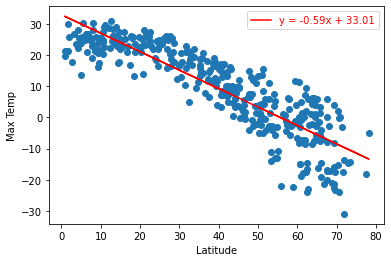

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(x_values, y_values)

plt.show()


The r-value is: 0.22676716426615018


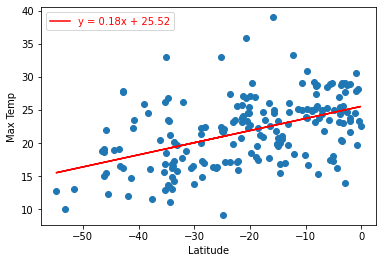

In [ ]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(x_values, y_values)

plt.show()

**Discussion about the linear relationship:** 
Within the Nothern Hemisphere, the data is showing a strong relationshiop between Latitude and Temperature.  Generally, the higher the latitude the lower the max temperature.  

The Southern Hemisphere's relationship is opposite of Northern's, however, it's not as consistent given the r-value is .419 vs Northern's .739.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10416836754413704


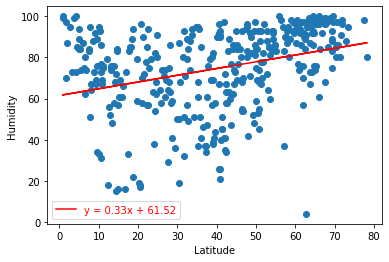

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_values, y_values)

plt.show()

The r-value is: 0.10779566653858853


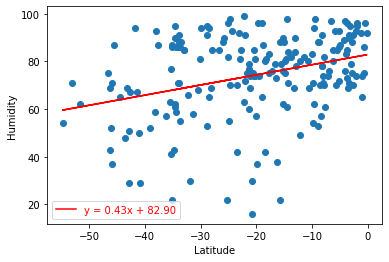

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_values, y_values)

plt.show()

**Discussion about the linear relationship:** 
The linear regression line between Latitude and Humidity shows no relationship on Northern nor Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0777317329091218


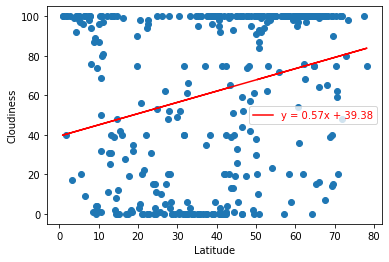

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_values, y_values)

plt.show()

The r-value is: 0.03980733360079893


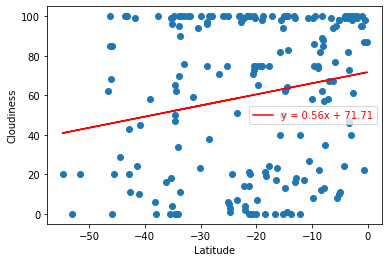

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_values, y_values)

plt.show()

**Discussion about the linear relationship:**
The linear regression line between Latitude and Cloudiness shows no relationship on Northern nor Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05797936332040368


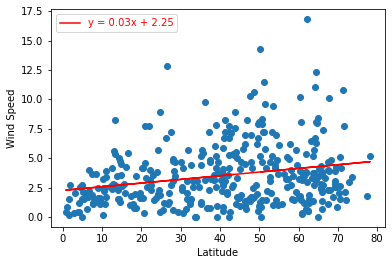

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_values, y_values)

plt.show()

The r-value is: 0.09748939024129875


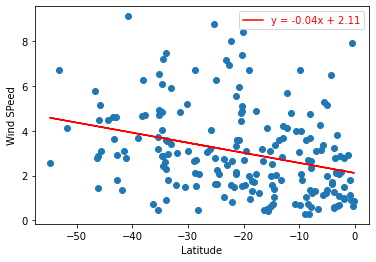

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

Linear_Regression_Plots(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Wind SPeed")

plt.scatter(x_values, y_values)

plt.show()

**Discussion about the linear relationship:** 
The linear regression line between Latitude and Wind Speed shows no relationship on Northern nor Southern Hemisphere.